# 프로젝트
- 00 약품 처방 건수 예측하기
- 파일명 : drugs.csv

In [2]:
import pandas as pd 

df = pd.read_csv('./data/drugs.csv')
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


## 시각화

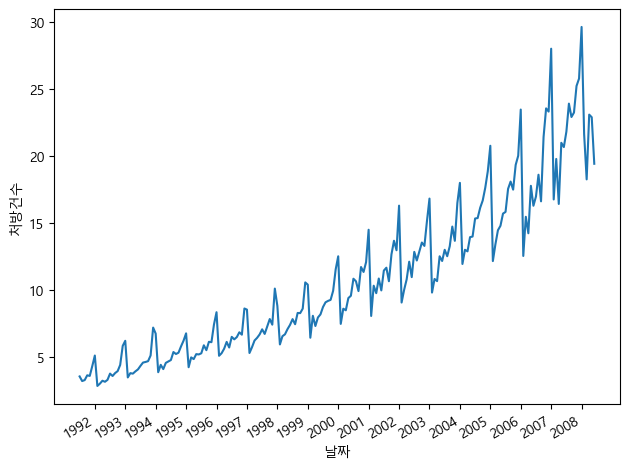

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

fig, ax = plt.subplots()

ax.plot(df.y)
ax.set_xlabel('날짜')
ax.set_ylabel('처방건수')

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## 미션 및 절차
- 주어진 데이터를 기반으로 향후 12개월의 롤링 예측을 수행한다.
- 시계열 분해
- 적합한 모델 결정
- 정상성 결정
- 차분 결정
- 최적의(p,d,q)(P,D,Q)m 매개변수 찾기
- 잔차분석 모델 검증

In [13]:
# ADF
# 정상성 확인 

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['y'])
result[0], result[1]

(np.float64(3.145185689306735), 1.0)

In [8]:
# 정상성 결정

def stationarity(x):
    if p_value < 0.05:
        print('대립가설 채택') # 정상
    else:
        print('귀무가설 채택') # 비정상

stationarity(result[1])       # 차분 전 정상성 검사

귀무가설 채택


In [26]:
# 차분
import numpy as np

diff_df = np.diff(df['y'], n = 1)
print(diff_df)

[ -0.3457       0.07133      0.358782    -0.045134     0.740502
   0.781964    -2.273815     0.171291     0.218969    -0.077202
   0.142945     0.46732782  -0.17907473   0.21842564   0.14728869
   0.4620405    1.42401825   0.38151852  -2.7412107    0.32144987
  -0.03800396   0.17109602   0.14428822   0.26587838   0.24661903
   0.04647748   0.05918926   0.42599016   2.08612075  -0.44848912
  -2.8901955    0.55279799  -0.31873484   0.46530417   0.10497018
   0.10699145   0.59799814  -0.14614983   0.09719646   0.47209086
   0.43085132   0.54489034  -2.53341647   0.73328211  -0.12630456
   0.37170929  -0.02396708   0.08595446   0.59853572  -0.36454828
   0.62456422  -0.02682039   1.32812508   0.9128542   -3.25965627
   0.19276082   0.33456961   0.51316972  -0.42113516   0.79768849
  -0.18628      0.16690641   0.36115365  -0.17955113   1.95785895
  -0.0824662   -3.24655264   0.43638508   0.50022563   0.19740011
   0.25578645   0.38311538  -0.34591241   0.546069     0.56874557
  -0.42163212 

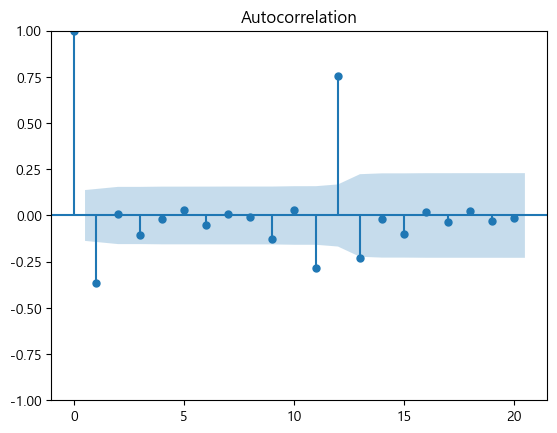

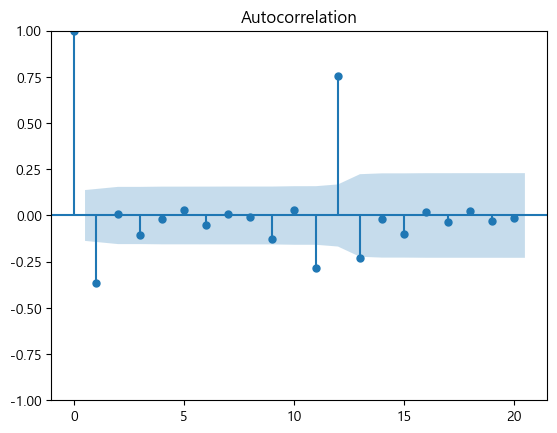

In [27]:
# p,d,q 매개변수 찾기
## acf

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_df, lags = 20)

In [32]:
# 모델 선택

# sarimax model 사용
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(enforce_stationarity = False,
                enforce_invertibility = False,
                seasonal_order = (1,1,1, 12),
                order = (1,1,1),
                exog = None,
                endog = diff_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  203
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -259.790
Date:                            Thu, 22 May 2025   AIC                            529.581
Time:                                    14:45:32   BIC                            545.433
Sample:                                         0   HQIC                           536.011
                                            - 203                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6236      0.033    -18.802      0.000      -0.689      -0.559
ma.L1         -1.0000    120.342     -0.008      0.993    -236.866     234.866
ar.S.L12      -0.1945      0.180     -1.080      0.280      -0.548       0.159
ma.S.L12      -0.3813      0.162     -2.353      0.019      -0.699      -0.064
sigma2         1.0781    129.728      0.008      0.993    -253.184     255.340
===================================================================================
Ljung-Box (L1) (Q):                   8.14   Jarque-Bera (JB):               270.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.84   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
##

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value.extend(last_value for _ in range(window))
        return perd_last_value

    elif method == 'MA':
        pred_MA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:1], order = (0,0,2))

            res = model.fit(disp = False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA

In [39]:
train = diff_df[:int(0.9*len(diff_df))]
test = diff_df[int(0.9*len(diff_df)):]
print(len(train), len(test))

182 21


In [41]:
pred_df = diff_df.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(diff_df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(diff_df, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(diff_df, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_maen'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'values'